In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

separator = os.path.sep
path_act = os.path.dirname(os.path.abspath("__file__"))
dir = separator.join(path_act.split(separator)[:-1])

def generated_tts(): #crear dataframe
    df = pd.read_csv(f'{dir}/abecedario.csv')
    df.columns = [i for i in range(df.shape[1])]
    df = df.rename(columns={63: 'Output'})
    X = df.iloc[:, :-1]
    Y = df.iloc[:, -1]
    return train_test_split(X, Y, test_size=0.2)

def path_act():
    separator = os.path.sep
    path_act = os.path.dirname(os.path.abspath("__file__"))
    dir = separator.join(path_act.split(separator)[:-1])
    return str(dir)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score #metricas
import seaborn as sns #para hacer graficas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC #algoritmo
import pickle #guardar y exportar el modelo

In [13]:
X_train, X_test, y_train, y_test = generated_tts() 

In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
316,0.564439,0.573853,-4.180799e-07,0.503185,0.585428,-0.004023,0.438181,0.553197,-0.007360,0.393171,...,-0.020623,0.451953,0.309242,-0.040235,0.408597,0.358163,-0.049722,0.388694,0.411444,-0.051673
413,0.533176,0.997014,1.774780e-06,0.468815,0.987083,-0.087036,0.433377,0.903533,-0.151695,0.477577,...,-0.149982,0.666961,0.691924,-0.233243,0.625383,0.788013,-0.254513,0.579338,0.865252,-0.257058
490,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
418,0.550011,0.993663,1.505142e-06,0.477637,0.987942,-0.090777,0.436277,0.909396,-0.153806,0.478495,...,-0.127955,0.651497,0.678179,-0.208896,0.612429,0.771987,-0.232348,0.574078,0.850361,-0.236503
236,0.549195,0.870660,-1.009039e-06,0.462713,0.814966,0.003978,0.402274,0.683563,0.009909,0.374201,...,-0.010424,0.523283,0.350962,-0.032185,0.494946,0.265514,-0.038759,0.470070,0.184947,-0.035234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.655119,0.527233,-2.842501e-07,0.634234,0.355644,0.008007,0.576138,0.238990,0.009652,0.499876,...,-0.028670,0.416843,0.556209,-0.016332,0.441389,0.559191,0.002344,0.468773,0.563883,0.013544
204,0.516817,0.863881,-1.006402e-06,0.431446,0.805814,0.005343,0.377507,0.665357,0.015575,0.359281,...,-0.001519,0.501965,0.336385,-0.019536,0.479900,0.240958,-0.026267,0.462814,0.154821,-0.023935
73,0.656747,0.518176,-2.976438e-07,0.634017,0.351741,0.006467,0.576019,0.234148,0.006714,0.499612,...,-0.033758,0.417305,0.550408,-0.024281,0.441962,0.555320,-0.006222,0.469530,0.560979,0.005099
137,0.611559,0.735025,-1.323397e-07,0.526735,0.771152,-0.055527,0.428902,0.693115,-0.087124,0.349149,...,-0.055371,0.607022,0.213162,-0.090530,0.585235,0.190273,-0.104943,0.579740,0.252166,-0.105589


In [15]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [16]:
predicciones = model.predict(X_test)
predicciones

array(['u', 'a', 'u', 'i', 'e', 'e', 'o', 'i', 'i', 'a', 'u', 'u', 'a',
       'e', 'a', 'e', 'a', 'o', 'i', 'e', 'o', 'o', 'e', 'i', 'u', 'o',
       'i', 'u', 'u', 'i', 'u', 'i', 'u', 'a', 'u', 'a', 'u', 'e', 'u',
       'e', 'e', 'o', 'e', 'i', 'i', 'e', 'e', 'o', 'a', 'i', 'i', 'e',
       'o', 'o', 'a', 'a', 'a', 'i', 'e', 'e', 'u', 'o', 'i', 'o', 'a',
       'u', 'u', 'u', 'u', 'a', 'e', 'u', 'u', 'i', 'a', 'o', 'o', 'u',
       'u', 'o', 'e', 'a', 'o', 'u', 'a', 'e', 'e', 'a', 'e', 'e', 'u',
       'e', 'u', 'i', 'i', 'a', 'a', 'e', 'e', 'i'], dtype=object)

In [18]:
matriz_confusion = confusion_matrix(y_test, predicciones)
f1 = f1_score(y_test, predicciones, average='micro')
recall = recall_score(y_test, predicciones, average='micro')
precision = precision_score(y_test, predicciones, average='micro')
f1, recall, precision

(0.94, 0.94, 0.94)

<AxesSubplot:title={'center':'Matriz de Confusion'}>

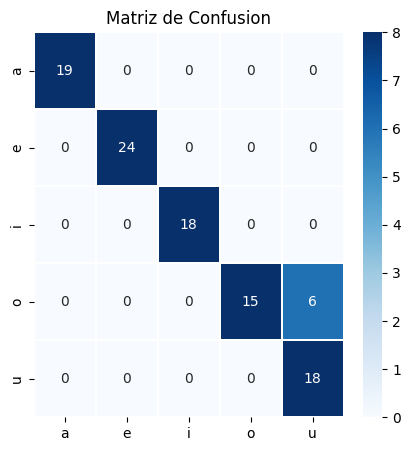

In [21]:
labels = ["a","e","i","o","u"]

fig, ax = plt.subplots(figsize=(5, 5))

ax.set_title("Matriz de Confusion")

maping = sns.heatmap(matriz_confusion, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [22]:
np.array(predicciones==y_test)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [23]:
directorio = path_act()

In [24]:
directorio

'C:\\Users\\Noelia\\Desktop\\finalProject'